<a href="https://colab.research.google.com/github/s23912/pad/blob/main/PAD_LAB_04_ZADANIE_DOMOWE_pawel_ungier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Pawel Ungier
#s23912

In [3]:
#Zbiór: London_merged. Zbiór danych dotyczy bike-sharingu w Londynie.
#a) Przeprowadź regresję liniową, w której zmienną zależną jest kolumna cnt (wyłącz z analiz pierwszą kolumnę).

import pandas as pd
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/PAD/PAD_04/Zadanie_domowe/london_merged.csv'
df = pd.read_csv(path, sep=',')

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
#sprawdzenie wartości - preprocessing
print(df.shape)
print(df.isnull().any(axis=1).sum())

(17414, 10)
0


#a) Przeprowadź regresję liniową, w której zmienną zależną jest kolumna cnt (wyłącz z analiz pierwszą kolumnę).


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df_notimestamp= df.drop(labels='timestamp', axis = 1)
df_notimestamp.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
y=df_notimestamp['cnt']
x=df_notimestamp.drop(labels='cnt',axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predict = model.predict(X_test)
from sklearn.metrics import r2_score
r_sq_linear_reg = r2_score(y_test, predict)
r_sq_linear_reg

0.26262497388037875

#b) Z koluny time stamp stwórz kolumnę hour oraz year

In [16]:
import datetime
from datetime import datetime

df['timestamp']= pd.to_datetime(df['timestamp'])
df['year'] = pd.to_datetime(df['timestamp'], format='%Y:%M:%D').dt.year
df['hour'] = pd.to_datetime(df['timestamp'], format='%Y:%M:%D').dt.hour

df_time = df.copy()
df_time = df_time.drop(['timestamp'], axis=1)
df_time.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4


# c) Wskaż, które parametry regresji są istotne na poziomie istotności 0,05

In [17]:
import statsmodels.api as sm
X_test= sm.add_constant(X_test)
model = sm.OLS(y_test,X_test)
results = model.fit()
params_005 = results.pvalues
#Get params significant at 0.05 p-value
print(params_005[params_005<=0.05])

const         3.222111e-69
t1            1.123502e-04
hum           2.801451e-85
is_holiday    2.525277e-03
is_weekend    6.857203e-12
season        5.556435e-06
dtype: float64


#d) Przedstaw korelacje między wszystkimi zmiennymi za pomocą heatmapy.
.


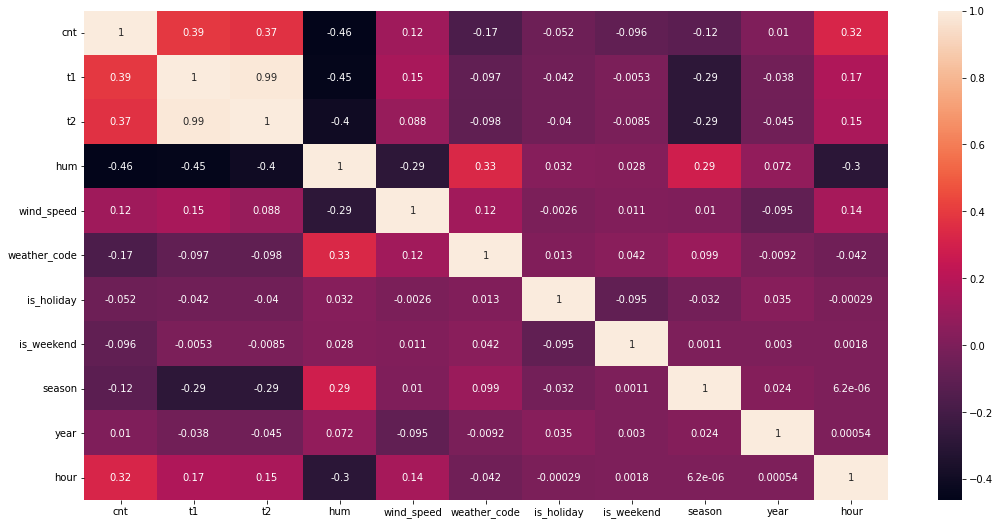

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = df.corr()
plt.figure(figsize=(18,9))
sns.heatmap(df_corr, annot = True)

#e) Podziel dane ze względu na rok, przeprowadź dla każdego z lat osobną analizę regresyjną

In [23]:
print(df_time.groupby('year')['cnt'].nunique())

year
2015    2967
2016    3040
2017      71
Name: cnt, dtype: int64


In [25]:
df_2015 = df_time[df_time["year"] == 2015]
df_2016 = df_time[df_time["year"] == 2016]
df_2017 = df_time[df_time["year"] == 2017]
scope = [df_2015, df_2016, df_2017]

In [26]:
def regression_function(df):
  df = df
  df = df.copy()
  print(df.head(3))
  df_y = df['cnt']
  df_x = df.drop(['cnt'], axis = 1)
  model = LinearRegression()
  model.fit(df_x, df_y)
  prediction = model.predict(df_x)
  r_squared_linear_reg = r2_score(df_y, prediction)
  print("R^2 is equal to: {}".format(r_squared_linear_reg))

for r in scope:
  regression_function(r)
  print()

   cnt   t1   t2   hum  wind_speed  ...  is_holiday  is_weekend  season  year  hour
0  182  3.0  2.0  93.0         6.0  ...         0.0         1.0     3.0  2015     0
1  138  3.0  2.5  93.0         5.0  ...         0.0         1.0     3.0  2015     1
2  134  2.5  2.5  96.5         0.0  ...         0.0         1.0     3.0  2015     2

[3 rows x 11 columns]
R^2 is equal to: 0.305085587227681

      cnt   t1   t2   hum  ...  is_weekend  season  year  hour
8643  786  6.0  3.5  81.0  ...         0.0     3.0  2016     0
8644  660  5.5  3.0  84.0  ...         0.0     3.0  2016     1
8645  387  5.0  2.5  84.0  ...         0.0     3.0  2016     2

[3 rows x 11 columns]
R^2 is equal to: 0.3043269423313456

       cnt   t1   t2   hum  ...  is_weekend  season  year  hour
17342  933  7.5  5.0  84.5  ...         1.0     3.0  2017     0
17343  895  7.0  5.0  87.0  ...         1.0     3.0  2017     1
17344  339  7.0  4.0  87.0  ...         1.0     3.0  2017     2

[3 rows x 11 columns]
R^2 is equal t